<a href="https://colab.research.google.com/github/robiul-islam-rubel/DL_FaceMask_Detection_Using_CNN/blob/main/DL_Project2_Face_Mask_Detection_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [3]:
with_mask_files = os.listdir('/content/drive/MyDrive/Data Sets/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3479.jpg', 'with_mask_3482.jpg', 'with_mask_3451.jpg', 'with_mask_3450.jpg', 'with_mask_3458.jpg']
['with_mask_1658.jpg', 'with_mask_1667.jpg', 'with_mask_1662.jpg', 'with_mask_1649.jpg', 'with_mask_1666.jpg']


In [6]:
without_mask_files = os.listdir('/content/drive/MyDrive/Data Sets/data/without_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['without_mask_3537.jpg', 'without_mask_3544.jpg', 'without_mask_3559.jpg', 'without_mask_3538.jpg', 'without_mask_3567.jpg']
['without_mask_1745.jpg', 'without_mask_1723.jpg', 'without_mask_1727.jpg', 'without_mask_1756.jpg', 'without_mask_1735.jpg']


In [7]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3828
Number of without mask images: 3828


In [8]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [9]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [10]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [11]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


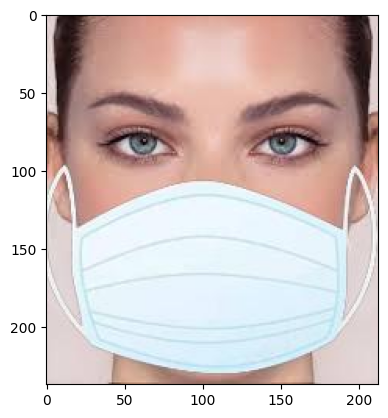

In [15]:
# displaying with mask image
img = mpimg.imread('/content/drive/MyDrive/Data Sets/data/with_mask/with_mask_1546.jpg')
imgplot = plt.imshow(img)
plt.show()

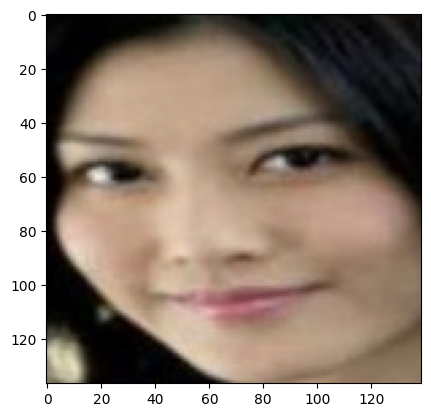

In [17]:
# displaying without mask image
img = mpimg.imread('/content/drive/MyDrive/Data Sets/data/without_mask/without_mask_1546.jpg')
imgplot = plt.imshow(img)
plt.show()

In [35]:
# convert images to numpy arrays+

with_mask_path = '/content/drive/MyDrive/Data Sets/data/without_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/drive/MyDrive/Data Sets/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [36]:
type(data)

list

In [37]:
len(data)

7656

In [38]:
data[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [220, 220, 220],
        [220, 220, 220],
        [220, 220, 220]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [220, 220, 220],
        [220, 220, 220],
        [220, 220, 220]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [220, 220, 220],
        [220, 220, 220],
        [220, 220, 220]],

       ...,

       [[224, 217, 224],
        [220, 220, 221],
        [217, 222, 218],
        ...,
        [255, 252, 247],
        [255, 250, 247],
        [255, 254, 251]],

       [[223, 217, 223],
        [221, 221, 223],
        [217, 223, 218],
        ...,
        [227, 211, 206],
        [254, 248, 245],
        [254, 253, 249]],

       [[221, 217, 222],
        [223, 223, 224],
        [218, 224, 219],
        ...,
        [173, 156, 151],
        [216, 207, 204],
        [255, 253, 250]]

In [39]:
type(data[0])

numpy.ndarray

In [40]:
data[0].shape

(128, 128, 3)

In [41]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

In [43]:
type(Y)

numpy.ndarray

In [44]:
print(X.shape)
print(Y.shape)

(7656, 128, 128, 3)
(7553,)


In [45]:
print(Y)

[1 1 1 ... 0 0 0]


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

ValueError: ignored

In [49]:
print(X.shape, X_train.shape, X_test.shape)

NameError: ignored

In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
X_train[0]

In [ ]:
X_train_scaled[0]

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')